In [17]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [18]:
#Loading Flight Ticket Price prediction  Train database
Train=pd.read_excel('Flight_train.xls')
Train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [19]:
#Loading Flight Ticket Price prediction  Test database
Test=pd.read_excel('Flight_Test.xls')
Test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [20]:
# Name of the Train and Test DataBase  columns.
print("Train DataBase  columns" )
print(Train.columns)
print("")
print("")
print("Test DataBase  columns")
print(Test.columns)

Train DataBase  columns
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


Test DataBase  columns
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')


In [21]:
# Shape of the Train and Test database .
print ("Shape of the Train database ")
print(Train.shape)
print(" ")
print ("Shape of the Test database ")
print(Test.shape)


Shape of the Train database 
(10683, 11)
 
Shape of the Test database 
(2671, 10)


In [22]:
#information of the  Train database
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [23]:
#datatypes of both databases.
print("Datatypes of Train Database")
print(Train.dtypes)
print( " ")
print("Datatypes of Test Database")
print(Test.dtypes)

Datatypes of Train Database
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object
 
Datatypes of Test Database
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object


In [24]:
#finding null values in the database

print( "Null values in Train Database")
print(Train.isnull().sum())
print( " ")
print( "Null values in Test Database")
print(Test.isnull().sum())

Null values in Train Database
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
 
Null values in Test Database
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [25]:
# Describing Train Database.
Train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [26]:
# Droping Null values from Train Database.
Train=Train.dropna(axis=0)

In [27]:
# Shape of the Train database 
print ("Shape of the Train database ")
print(Train.shape)
print(" ")

Shape of the Train database 
(10682, 11)
 


In [28]:
print ("Shape of the Test database ")
print(Test.shape)


Shape of the Test database 
(2671, 10)


# Bivariate Analysis

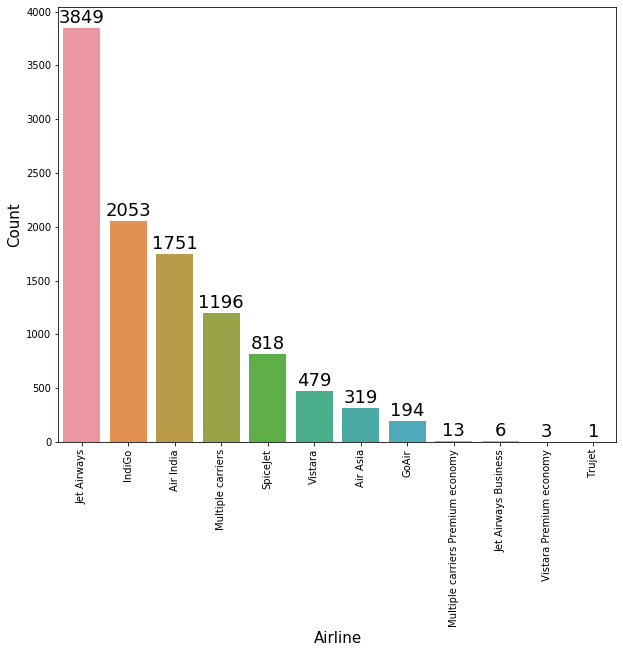

In [565]:
# Countplot of Which airline has been used  Maximum .
plt.figure(figsize=(10,8))
pd =sns.countplot(x = "Airline" ,  data=Train, order=df['Airline'].value_counts().index)
for p in pd.patches:
    pd.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=18,
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.xticks(rotation= 90)
plt.xlabel("Airline", size=15)
plt.ylabel("Count" ,size=15)
plt.show()
#Conclusion:-  Jet Airways  has been used Maximum .

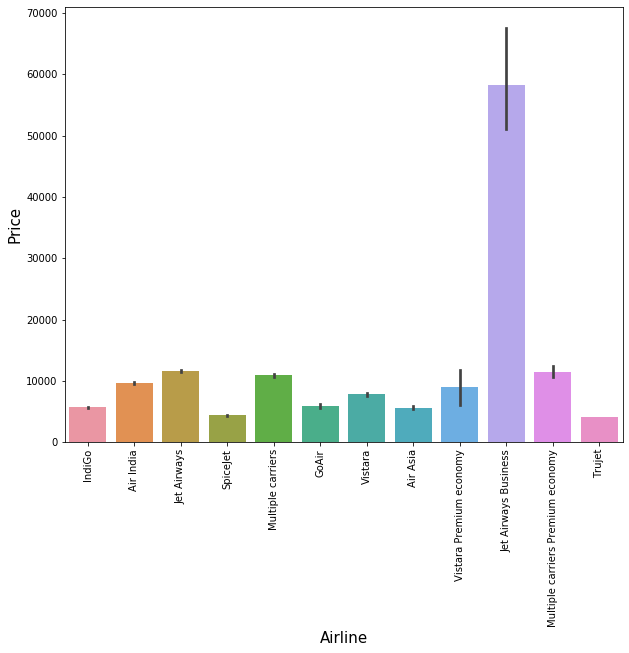

In [566]:
#lets check which airline is expensive based on average Flight price
plt.figure(figsize=(10,8))
sns.barplot(x="Airline",y="Price",data=Train)

plt.xticks(rotation= 90)
plt.xlabel("Airline", size=15)
plt.ylabel("Price" ,size=15)
plt.show()
# Conclusion:- Jet Airways Business class is most expensive average flight ticket price.

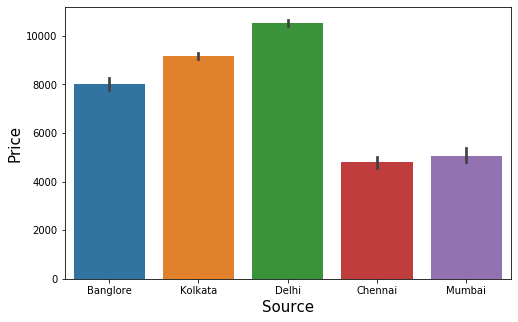

In [567]:
#Lets chcek from which region average flight price  is more.
plt.figure(figsize=(8,5))
sns.barplot(x="Source",y="Price",data=Train)
plt.xlabel("Source", size=15)
plt.ylabel("Price" ,size=15)
plt.show()
#Conclusion:- In delhi region average flight price is more.

# Univariate Analysis

{'bodies': [<matplotlib.collections.PolyCollection at 0x2d6a17cc9c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2d6a17c0c48>,
 'cmins': <matplotlib.collections.LineCollection at 0x2d6a0b27848>,
 'cbars': <matplotlib.collections.LineCollection at 0x2d6a0b27ec8>}

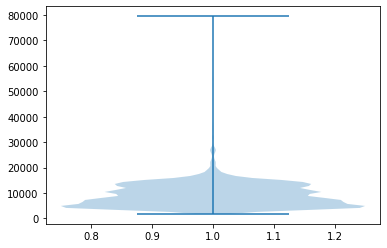

In [12]:
# Making Violinplot  of Price.
plt.violinplot(Train["Price"])

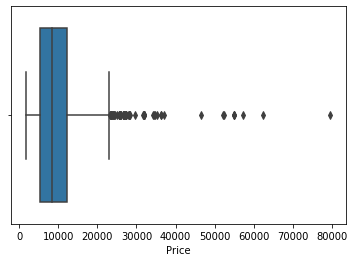

In [15]:
# Making Boxplot of Price columns
sns.boxplot(x='Price' , data=Train)

In [29]:
# Adding Both Databases.
df=Train.append(Test)

# Feature Engineering 

In [30]:
# Spliting  Date_of_Journey column into Date , Month , Year column.
df["Date"] = df["Date_of_Journey"].str.split("/").str[0]
df["Month"]=df["Date_of_Journey"].str.split("/").str[1]
df["Year"] =df["Date_of_Journey"].str.split("/").str[2]

In [31]:
# Droping " Date_of_Journey" column.
df=df.drop(['Date_of_Journey'],axis=1)

# Arrival_Time Column

In [32]:
# In the Arrival_Time Column we have combination of time and Month ,we will only extract time data from it and splitting into data and month.
df["Arrival_Time"]=df["Arrival_Time"].str.split(' ').str[0]

In [33]:
df['Arrival_Hour'] = df['Arrival_Time'].str.split(":").str[0]
df['Arrival_Minute'] =df['Arrival_Time'].str.split(':').str[1]


In [34]:
# Converting data into integer format
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)
df['Arrival_Minute'] =df['Arrival_Minute'].astype(int)

In [35]:
# Droping Arrival_Time column.
df=df.drop(['Arrival_Time'],axis=1)

# Total_Stops column

In [36]:
# We take only number data from Total_Stops column.
df['Total_Stops']=df['Total_Stops'].replace('non-stop','0 stop')
df['Stop'] =df['Total_Stops'].str.split(' ').str[0]
df['Stop'] =df['Stop'].astype(int)

In [37]:
# droping Total_Stops Column.
df=df.drop(['Total_Stops'],axis=1)

# Dep_Time Column

In [38]:
# In this  Dep_Time  Column we split  data  into Hour and minute and convert it into integer

df['Dep_Hour']=df['Dep_Time'].str.split(':').str[0]
df['Dep_Minute']=df['Dep_Time'].str.split(':').str[1]
df['Dep_Hour']=df['Dep_Hour'].astype(int)
df['Dep_Minute']=df['Dep_Minute'].astype(int)
df=df.drop(['Dep_Time'],axis=1)

# Route Column

In [39]:
# Splitting Route column to extract information .

df['Route_1'] =df['Route'].str.split('→ ').str[0]
df['Route_2'] =df['Route'].str.split('→ ').str[1]
df['Route_3'] =df['Route'].str.split('→ ').str[2]
df['Route_4'] =df['Route'].str.split('→ ').str[3]
df['Route_5'] =df['Route'].str.split('→ ').str[4]


In [40]:
# Replacing Nan Values with 'None'
df['Route_1'].fillna('None',inplace =True)
df['Route_2'].fillna('None',inplace =True)
df['Route_3'].fillna('None',inplace =True)
df['Route_4'].fillna('None',inplace =True)
df['Route_5'].fillna('None',inplace =True)

In [41]:
# Droping Route column.
df=df.drop(['Route'],axis=1)

# Duration Column

In [42]:
#Converting Duration into minutes
df['Duration']=  df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

# Additional_Info  Column

In [43]:

df['Additional_Info']=df['Additional_Info'].replace('No info','No Info')
df['Additional_Info']=df['Additional_Info'].replace('In-flight meal not included','No Meal Provided')
df['Additional_Info']=df['Additional_Info'].replace('No check-in baggage included','No baggage Check in included')

In [45]:
df

,Airline,Source,Destination,Duration,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Stop,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,170,No Info,3897.0,24,03,2019,1,10,0,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,445,No Info,7662.0,1,05,2019,13,15,2,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,1140,No Info,13882.0,9,06,2019,4,25,2,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,325,No Info,6218.0,12,05,2019,23,30,1,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,285,No Info,13302.0,01,03,2019,21,35,1,16,50,BLR,NAG,DEL,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1435,No Info,NaN,6,06,2019,20,25,1,20,30,CCU,DEL,BLR,None,None
2667,IndiGo,Kolkata,Banglore,155,No Info,NaN,27,03,2019,16,55,0,14,20,CCU,BLR,None,None,None
2668,Jet Airways,Delhi,Cochin,395,No Info,NaN,6,03,2019,4,25,1,21,50,DEL,BOM,COK,None,None
2669,Air India,Delhi,Cochin,915,No Info,NaN,6,03,2019,19,15,1,4,0,DEL,BOM,COK,None,None


In [46]:
#Using Label Encoder 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Airline','Source','Destination','Additional_Info','Year',"Route_1",'Route_2',"Route_3","Route_4","Route_5"]
for val in list1:
     df[val]=le.fit_transform(df[val].astype(str))

In [47]:
# Splitting Test and Train database.
Train=df[0:10682]
Test=df[10682:]
Test=Test.drop(['Price'],axis=1)

In [48]:
x=Train.drop(['Price'],axis=1)
y=Train["Price"]

# Splitting Data into target and Input

In [49]:
x

,Airline,Source,Destination,Duration,Additional_Info,Date,Month,Year,Arrival_Hour,Arrival_Minute,Stop,Dep_Hour,Dep_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,170,5,24,03,0,1,10,0,22,20,0,13,24,12,4
1,1,3,0,445,5,1,05,0,13,15,2,5,50,2,25,1,3,4
2,4,2,1,1140,5,9,06,0,4,25,2,9,25,3,32,4,5,4
3,3,3,0,325,5,12,05,0,23,30,1,18,5,2,34,3,12,4
4,3,0,5,285,5,01,03,0,21,35,1,16,50,0,34,8,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,5,9,04,0,22,25,0,19,55,2,5,24,12,4
10679,1,3,0,155,5,27,04,0,23,20,0,20,45,2,5,24,12,4
10680,4,0,2,180,5,27,04,0,11,20,0,8,20,0,13,24,12,4
10681,10,0,5,160,5,01,03,0,14,10,0,11,30,0,13,24,12,4


In [50]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [51]:
# standard scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [52]:
x.skew()

Airline             0.731057
Source             -0.424023
Destination         1.244046
Duration            0.861411
Additional_Info    -0.189037
Date                0.118174
Month              -0.387409
Year                0.000000
Arrival_Hour       -0.370146
Arrival_Minute      0.110945
Stop                0.317109
Dep_Hour            0.112924
Dep_Minute          0.167234
Route_1            -0.618513
Route_2             1.424486
Route_3             0.582579
Route_4            -2.103798
Route_5           -16.440835
dtype: float64

In [53]:
#Reducing  Skewness
import numpy as np
for col in x.columns:
    if x.skew().loc[col]>0.55:
         x[col]=np.log1p(x[col])

# Importing Necessary libraries

In [54]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

In [55]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        regr.fit(x,y)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_i=i
    print(" We are getting maximum  r2 score corresponding to",final_i,"is",max_r_score)
    return final_i

In [56]:
# using Grid search CV to find best  parameters of different algorithim .
knn=KNeighborsRegressor()
parameters={"n_neighbors" :(5,20) , 'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute']}
gd=GridSearchCV(knn,parameters)
gd.fit(x,y)
print(" Best parameters of KNeighborsRegressor is :-")
print(gd.best_params_)
print("\n")

lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1] , 'selection' : ['cyclic', 'random']}
gd=GridSearchCV(lsreg,parameters)
gd.fit(x,y)
print(" Best parameters of Lasso is :-")
print(gd.best_params_)
print("\n")

dtc=DecisionTreeRegressor()
parameters={"criterion" :( 'mse', 'friedman_mse', 'mae') ,'max_features' : ['auto', 'sqrt', 'log2']}
gd=GridSearchCV(dtc,parameters)
gd.fit(x,y)
print(" Best parameters of DecisionTreeRegressor is :-")
print(gd.best_params_)
print("\n")


#Best parameters for  AdaBoostRegressor
ada=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[25,50,100,150,200]}
gd=GridSearchCV(ada,parameters)
gd.fit(x,y)
print(" Best parameters of AdaBoostRegressor is :-")
print(gd.best_params_)
print("\n")

 Best parameters of KNeighborsRegressor is :-
{'algorithm': 'ball_tree', 'n_neighbors': 5}


 Best parameters of Lasso is :-
{'alpha': 1, 'selection': 'cyclic'}


 Best parameters of DecisionTreeRegressor is :-
{'criterion': 'friedman_mse', 'max_features': 'auto'}


 Best parameters of AdaBoostRegressor is :-
{'learning_rate': 0.1, 'n_estimators': 100}




In [60]:
# Finding best r2 score value for Linear Regression 
print("Linear Regression")
print("................. ")
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)
print(" ")
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print(" ")
print("#############################################################################")
print(" ")


# Finding best r2 score value for KNeighbors regressor 
print("KNeighbors regressor ")
print("..................... ")
knn=KNeighborsRegressor(n_neighbors= 20 , algorithm = 'auto')
i=maxr2_score(knn,x,y)
print(" ")
from sklearn.model_selection import cross_val_score
print("Mean r2 score for KNeighbor  Regression:",cross_val_score(knn,x,y,cv=135,scoring="r2").mean())
print("standard deviation in r2 score for KNeighbor   Regression",cross_val_score(knn,x,y,cv=5,scoring="r2").std())
print(" ")
print("##############################################################################")
print(" ")


# Finding best r2 score value for Lasso Regressor 
print("Lasso Regressor")
print("................ ")
lsreg=Lasso(alpha=0.01 , selection = 'cyclic')
i=maxr2_score(lsreg,x,y)
print(" ")
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Lasso Regression:",cross_val_score(lsreg,x,y,cv=63,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())
print(" ")
print("################################################################################")
print(" ")

# Finding best r2 score value for DecisionTreeRegressor
print("DecisionTreeRegressor")
print("...................... ")
dtc=DecisionTreeRegressor(criterion = 'mse'  , max_features = 'auto')
i=maxr2_score(dtc,x,y)
print(" ")
from sklearn.model_selection import cross_val_score
print("Mean r2 score for DecisionTreeRegressor :",cross_val_score(dtc,x,y,cv=139,scoring="r2").mean())
print("standard deviation in r2 score for DecisionTreeRegressor",cross_val_score(dtc,x,y,cv=5,scoring="r2").std())
print(" ")
print("#################################################################################")
print(" ")



# Finding best r2 score value for  AdaBoostRegressor
print("AdaBoostRegressor")
print(".................. ")
ada=AdaBoostRegressor(n_estimators=200 , learning_rate = 0.1)
i=maxr2_score(ada,x,y)
print(" ")
print("Mean r2 score for AdaBoostRegressor :",cross_val_score(ada,x,y,cv=10,scoring="r2").mean())
print("standard deviation in r2 score for AdaBoostRegressor ",cross_val_score(ada,x,y,cv=5,scoring="r2").std())
print(" ")
print("#####################################################################################") 


Linear Regression
................. 
 We are getting maximum  r2 score corresponding to 98 is 0.5608524190224531
 
Mean r2 score for Linear Regression: 0.5119174630743717
standard deviation in r2 score for Linear Regression 0.004386664631275604
 
#############################################################################
 
KNeighbors regressor 
..................... 
 We are getting maximum  r2 score corresponding to 98 is 0.6136858295684808
 
Mean r2 score for KNeighbor  Regression: 0.5117473730470442
standard deviation in r2 score for KNeighbor   Regression 0.016544337577330964
 
##############################################################################
 
Lasso Regressor
................ 
 We are getting maximum  r2 score corresponding to 98 is 0.5608531693255593
 
Mean r2 score for Lasso Regression: 0.5249810124471141
standard deviation in r2 score for Lasso Regression 0.004386595423474213
 
################################################################################
 
Dec

# Since Decision Tree Regressor is giving better result so we will use it as final model

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=94,test_size=0.20)
dtc=DecisionTreeRegressor(criterion = 'mse'  , max_features = 'auto')
dtc.fit(x,y)
y_pred=dtc.predict(x_test)

In [63]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is:  289.93458472497434
r2_score is: 0.996720495921457


# Saving the model

In [64]:
from sklearn.externals import joblib
joblib.dump(dtc,"Flight_Price.pkl")

['Flight_Price.pkl']

# Loading Model

In [65]:
model=joblib.load('Flight_Price.pkl')

# Using Model to predict data

In [69]:
db=model.predict(Test)
db

array([ 5583.,  7947.,  7308., ..., 11401., 11522.,  5583.])

# Saving Prediction in csv file

In [70]:
dft=pd.DataFrame(db)
dft.to_csv("Flight_Price1.csv")